<a href="https://colab.research.google.com/github/DaviKunrath/Machine-Learning/blob/main/Aula_pr%C3%A1tica_01_e_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem de Máquina I

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

Esta aula é inspirada no Ex. 10 do Cap. 6 de [ITSL], e tem como objetivo estudar, em dados sintéticos, o comportamento dos procedimentos de seleção de modelos que vimos em sala (Lasso, Ridge e Elastic Net).

## Parte 1

a) Gere um conjunto de dados $\mathbf{X}$ com $p = 20$ atributos e $n = 1.000$ observações. Após isso, gere um vetor de variáveis respostas de acordo com a equação $$\mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \varepsilon,$$ onde o vetor $\boldsymbol{\beta}$ contém a maioria das entradas iguais a zero.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
n = 1000 # quantidade de observações
p = 20 # quantidade de variáveis/covariáveis

X = 5*np.random.random(size = (n,p)) # gerando atributos uniformemente entre 0 e 5
beta = np.array([0, 8, 10, 0, 5,
                 -2, 0, 3, 0, -4,
                 0, 8, -1, 0, 1,
                 0, 3, -7, 0, 0]) # escolher beta esparso
epsilon = np.random.normal(loc = 0, scale = 50, size = n) # gerar um erro de observação "compativel"

y = X@beta + epsilon # "@" é o produto matriz-vetor no numpy (mas não é a única forma)


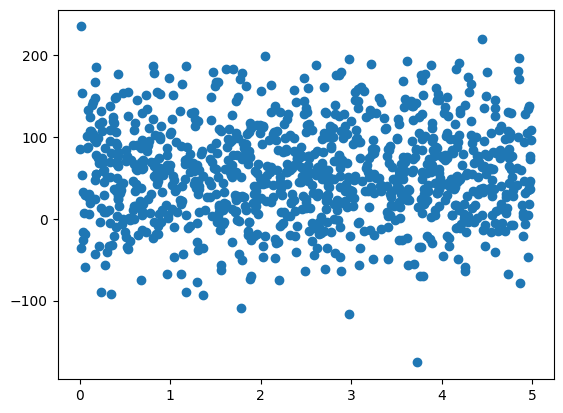

In [ ]:
plt.scatter(X[:, 3], y) # todas as observações da matriz X, referentes a um atributo de interesse,
                        # e plotando conta a resposta y.


b) Divida seu conjunto em treinamento e teste, com proporção de 90% e 10%, respectivamente.

In [ ]:
X_tr, X_te,y_tr ,y_te = train_test_split(X, y, test_size = 0.1)

In [ ]:
print(X.shape) # Teste de Sanidade
print(y.shape)

(1000, 20)
(1000,)


In [ ]:
print(X_tr.shape) # Teste de Sanidade
print(y_tr.shape)

print(X_te.shape)
print(y_te.shape)

(900, 20)
(900,)
(100, 20)
(100,)


c) Estude o *help* das funções `LinearRegression`, `Lasso`, `Ridge` e `ElasticNet` do `scikit-learn`.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

d) Ajuste modelos, escolhendo os hiperparâmetros a priori, através das funções `LinearRegression`, `Lasso`, `Ridge` e `ElasticNet`. Compare os resultados para os $\boldsymbol{\beta}$ obtidos.

In [ ]:
LinReg = LinearRegression() # instanciando uma réplica da classe LinearRegression, sem alterar nenhum
                            # dos parâmetros declarados por padrão

Las = Lasso(alpha = 10) # idem, para o Lasso, fixando alpha = 10 (valor aleatório)

RidCV = Ridge(alpha = 10) # idem, para o Ridge, fixando alpha = 10 (valor aleatório)

Las.fit(X_tr, y_tr)

LinReg.fit(X_tr, y_tr) # obter uma estimativa para beta

RidCV.fit(X_tr, y_tr)

Ridge(alpha=10)

In [ ]:
np.round(LinReg.coef_,3) # estimativa do beta

array([ 1.304, 11.05 ,  8.912, -0.212,  4.775, -0.04 , -2.334,  1.571,
        1.166, -3.948, -0.376,  6.966, -0.485,  1.436,  1.131, -0.241,
        1.456, -7.483,  0.608, -0.945])

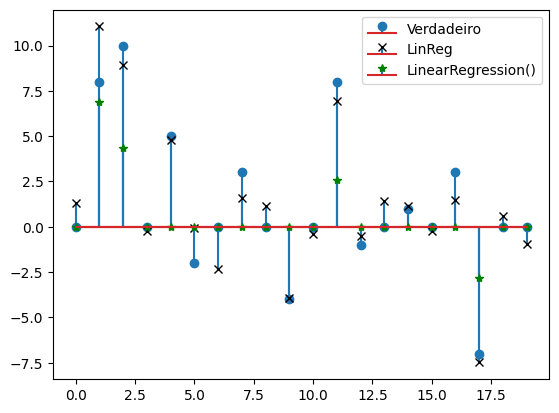

In [ ]:
plt.stem(beta, label = 'Verdadeiro') # plota beta verdadeiro, com uma legenda associada
plt.stem(LinReg.coef_, markerfmt = 'kx', label = 'LinReg') # plota a estimativa de beta, com a cabeça = x
plt.stem(Las.coef_, markerfmt = 'g*', label = LinReg)
plt.legend() # mostrar a legenda de cada gráfico

e) Faça as previsões com os modelos treinados acima no conjunto de teste, e calcule o MSE. Calcule também o MSE para o conjunto de treinamento.

## Parte 2

f) Agora, vamos encontrar o "melhor" valor do hiperparâmetro referente às penalizações acima e repetir as comparações que realizamos. Para isso, primeiramente, familiarize-se com a função `GridSearchCV`, lendo a sua documentação aqui: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

g) Implemente a busca em grade da função `GridSearchCV` para o `Lasso`, `Ridge` e `ElasticNet` e encontre os hiperparâmetros ótimos, dentro da grade que você definiu.

In [ ]:
alphas = np.linspace(0.5, 50, 100, endpoint = True) # Declarando a grade de busca do hiperparâmetro de interesse
# alphas = np.logspace(-3, 3, 101, endpoint = True)
# alphas

grid_Las = {'alpha': alphas} # Alocando a grade de busca dentro de um dicionário
# grid_Las
grid_Rid = {'alpha': alphas}

# Criando a réplica da classe GridSearchCV com as entradas adequadas
LasCV = GridSearchCV(estimator = Lasso(), param_grid = grid_Las,
                     scoring = 'neg_mean_squared_error', #quanto maior, melhor
                     cv = 5, verbose = 4, refit = True)
RidCV = GridSearchCV(estimator = Ridge(), param_grid = grid_Las, scoring = 'neg_mean_squared_error', cv = 5, verbose = 4, refit = True)

In [ ]:
LasCV.fit(X_tr,y_tr)
RidCV.fit(X_tr,y_tr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....................alpha=0.5;, score=-2422.602 total time=   0.0s
[CV 2/5] END .....................alpha=0.5;, score=-2595.393 total time=   0.0s
[CV 3/5] END .....................alpha=0.5;, score=-2873.593 total time=   0.0s
[CV 4/5] END .....................alpha=0.5;, score=-2809.745 total time=   0.0s
[CV 5/5] END .....................alpha=0.5;, score=-2935.752 total time=   0.0s
[CV 1/5] END .....................alpha=1.0;, score=-2433.315 total time=   0.0s
[CV 2/5] END .....................alpha=1.0;, score=-2575.606 total time=   0.0s
[CV 3/5] END .....................alpha=1.0;, score=-2885.353 total time=   0.0s
[CV 4/5] END .....................alpha=1.0;, score=-2793.027 total time=   0.0s
[CV 5/5] END .....................alpha=1.0;, score=-2920.335 total time=   0.0s
[CV 1/5] END .....................alpha=1.5;, score=-2446.066 total time=   0.0s
[CV 2/5] END .....................alpha=1.5;, 

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. ])},
             scoring='neg_mean_squared_error', verbose=4)

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(LasCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002497,0.001031,0.001178,0.000102,0.5,{'alpha': 0.5},-2422.601667,-2595.393429,-2873.592971,-2809.744539,-2935.752058,-2727.416933,190.730881,4
1,0.001604,0.000014,0.001055,0.000021,1.0,{'alpha': 1.0},-2433.314699,-2575.605992,-2885.352925,-2793.027253,-2920.335096,-2721.527193,187.528745,2
2,0.001673,0.000104,0.001048,0.000020,1.5,{'alpha': 1.5},-2446.065940,-2559.341878,-2904.868944,-2781.569306,-2909.481106,-2720.265435,186.933648,1
3,0.002143,0.000228,0.001216,0.000076,2.0,{'alpha': 2.0},-2460.395989,-2550.220103,-2927.807587,-2773.807802,-2905.811777,-2723.608652,188.021081,3
4,0.001614,0.000038,0.001057,0.000021,2.5,{'alpha': 2.5},-2475.874062,-2545.616880,-2952.539166,-2772.669907,-2907.527189,-2730.845441,190.490870,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001173,0.000074,0.000783,0.000042,48.0,{'alpha': 48.0},-3353.296375,-3084.793850,-3821.639765,-3369.390418,-3625.143886,-3450.852859,252.195514,53
96,0.001438,0.000448,0.000871,0.000131,48.5,{'alpha': 48.5},-3353.296375,-3084.793850,-3821.639765,-3369.390418,-3625.143886,-3450.852859,252.195514,53
97,0.001310,0.000225,0.000951,0.000161,49.0,{'alpha': 49.0},-3353.296375,-3084.793850,-3821.639765,-3369.390418,-3625.143886,-3450.852859,252.195514,53
98,0.001118,0.000027,0.000787,0.000020,49.5,{'alpha': 49.5},-3353.296375,-3084.793850,-3821.639765,-3369.390418,-3625.143886,-3450.852859,252.195514,53


In [ ]:
LasCV.best_estimator_

Lasso(alpha=np.float64(1.5))

h) Compare os $\boldsymbol{\beta}$ obtidos com esses procedimentos com os $\boldsymbol{\beta}$ obtidos anteriormente.

In [ ]:
LasCV.best_estimator_.coef_

array([ 0.52286884, 10.50313055,  8.33334653, -0.        ,  4.03814944,
       -0.        , -1.59324388,  0.95180968,  0.43331283, -3.1911185 ,
       -0.        ,  6.28553642, -0.        ,  0.79072575,  0.39623966,
       -0.        ,  0.95831946, -6.81849633,  0.        , -0.38060904])

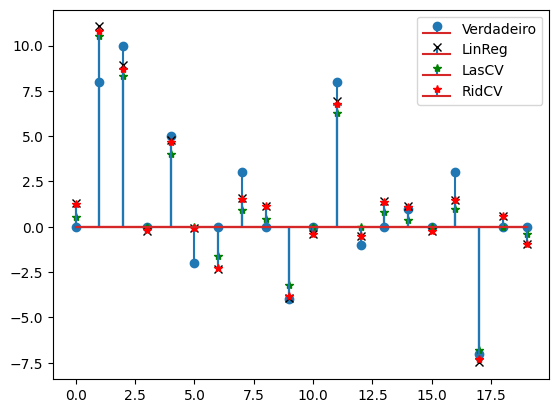

In [ ]:
plt.stem(beta, label = 'Verdadeiro') # plota beta verdadeiro, com uma legenda associada
plt.stem(LinReg.coef_, markerfmt = 'kx', label = 'LinReg') # plota a estimativa de beta, com a cabeça = x
plt.stem(LasCV.best_estimator_.coef_, markerfmt = 'g*', label = 'LasCV')
plt.stem(RidCV.best_estimator_.coef_, markerfmt = 'r*', label = 'RidCV')
plt.legend() # mostrar a legenda de cada gráfico

i) Faça as previsões com os novos modelos no conjunto de teste, e calcule o MSE. Calcule também o MSE para o conjunto de treinamento. Compare com o resultado obtido no item e).

In [ ]:
# Comparar os dois modelos 'vencedores' no conjunto de teste
LasCV.best_estimator_
LinReg

LinearRegression()

In [ ]:
y_te_LinReg = LinReg.predict(X_te)
y_te_LasCV = LasCV.predict(X_te)
y_te_RidCV = RidCV.predict(X_te)

In [ ]:
MSE_te_LinReg = MSE(y_te_LinReg, y_te)
MSE_te_LasCV = MSE(y_te_LasCV, y_te)
MSE_te_RidCV = MSE(y_te_RidCV, y_te)

In [ ]:
print(MSE_te_LinReg)
print(MSE_te_LasCV)
print(MSE_te_RidCV)

2416.1193101684707
2427.001326518062
2415.2207115260458
